## Loading basic Python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Answer the questions below. Explain your reasoning. 

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
%%R
 
# Import data with R
df <- read_csv('merged_data.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 33
        GEOID NAME         moe population white_race black_race asian_race  kids
        <dbl> <chr>      <dbl>      <dbl>      <dbl>      <dbl>      <dbl> <dbl>
1 36005000100 Census Tr…   616       4446         NA         NA         NA    NA
2 36005000100 Census Tr…   390         NA       1898         NA         NA    NA
3 36005000100 Census Tr…   369         NA         NA       2064         NA    NA
4 36005000100 Census Tr…    60         NA         NA         NA        123    NA
# ℹ 25 more variables: school_kids <dbl>, male_public_school <dbl>,
#   male_private_school <dbl>, female_public_school <dbl>,
#   female_private_school <dbl>, med_inc <dbl>, total_public_school <dbl>,
#   total_private_school <dbl>, Borough <chr>, Community.Board <dbl>,
#   School.Type <chr>, School.Name...ID <chr>, Address <chr>, Postcode <dbl>,
#   Latitude <dbl>, Longitude <dbl>, Council.District <dbl>,
#   Census.Tract <dbl>, BIN <dbl>, BBL <dbl>, NTA <chr>, STATE <dbl>, …


## Part 1 

### 👉 Question 1: Do families of students attending public schools have lower income than private schools?

1. Formulate a null hypothesis (H0) and an alternate hypothesis (Ha):
2. Plot the data
3. Apply a t-test
4. Interpret the result:
5. For yourself (using statsy language like "reject the null hypothesis that TKTK" or "fail to reject the null hypothesis that TKTK") 
6. For the reader (how would you explain the result to a reader?)



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 24403 rows containing missing values (`geom_point()`). 



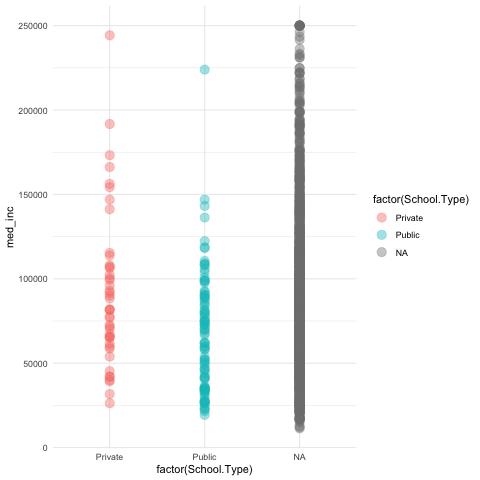

In [7]:
%%R 

# R cell

ggplot(df) +
    aes(x=factor(School.Type), y=med_inc, color=factor(School.Type)) +
    geom_point(size=4, alpha=.4) +
    theme_minimal()
    #apply a t test to the data
    

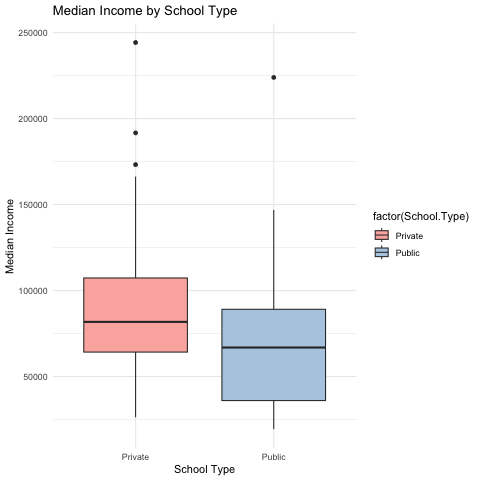

In [10]:
%%R

library(ggplot2)
library(dplyr)

# Ensure 'med_inc' is numeric if it's not already
df$med_inc <- as.numeric(df$med_inc)

# Remove rows with NA values in 'med_inc' or 'School.Type'
df_clean <- df %>%
  filter(!is.na(med_inc) & !is.na(School.Type))

# Create the boxplot
ggplot(df_clean, aes(x=factor(School.Type), y=med_inc, fill=factor(School.Type))) +
  geom_boxplot() +
  theme_minimal() +
  labs(x = "School Type", y = "Median Income", title = "Median Income by School Type") +
  scale_fill_brewer(palette = "Pastel1") # Optional: Use a color palette for aesthetics


In [8]:
%%R -o df
#df <- na.omit(df[!is.na(df$School.Type)]) # This line removes rows where School.Type is NA
t.test(df$med_inc ~ df$School.Type)



	Welch Two Sample t-test

data:  df$med_inc by df$School.Type
t = 3.1342, df = 68.336, p-value = 0.002539
alternative hypothesis: true difference in means between group Private and group Public is not equal to 0
95 percent confidence interval:
  8927.926 40210.188
sample estimates:
mean in group Private  mean in group Public 
             92388.73              67819.67 



### 👉 Answers to hypothesis testing

H0:There is no difference in the median incomes between private and public schools
Ha:There is a difference in the median incomes between private and public schools

Based on the Welch Two Sample t-test results, there is a statistically significant difference in median incomes between private and public schools, with private schools having a higher median income. 
The p-value indicates that the likelihood of observing such a difference if there were no actual difference in the population means is very low (about 0.25%).
The confidence interval provides a range of plausible values for the actual difference in means, further suggesting that the median income for private schools is higher than for public schools by an amount between approximately $8,928 and $40,210.

Therefore, we can reject the null hypothesis that there is no difference in the median incomes between private and public schools.

For the reader: The average student attending a private school is from a family that has higher median income than a student in a public school.





Chi Square test: Are there more students enrolled in public or private schools?


In [7]:
%%R
library(dplyr)

# Summarize total counts for public and private school enrollments, removing NAs
school_data <- df %>%
  select(total_public_school, total_private_school) %>%
  na.omit() %>%
  summarise(total_public = sum(total_public_school),
            total_private = sum(total_private_school))

# Display the summarized data
print(school_data)

observed <- c(school_data$total_public, school_data$total_private)
expected <- sum(observed) / 2  # Assuming equal distribution

# Chi-squared test
chi_test_result <- chisq.test(x = observed, p = c(0.5, 0.5))

# Print the test result
print(chi_test_result)



# A tibble: 1 × 2
  total_public total_private
         <dbl>         <dbl>
1      1466110        562127



	Chi-squared test for given probabilities

data:  observed
X-squared = 402904, df = 1, p-value < 2.2e-16



Given the p-value is much less than any common significance level (e.g., 0.05 or 0.01), I reject the null hypothesis. This indicates that there is a statistically significant difference in the distribution of school kids between public and private schools. Specifically, a substantially larger number of school kids attend public schools compared to private schools, far beyond what would be expected by random chance under the hypothesis of equal distribution.

In practical terms, this result suggests that factors influencing school choice or availability significantly favor public schooling over private schooling in the observed dataset. This could be due to a variety of reasons, including but not limited to the availability of public schools, cost considerations for private schools, or societal preferences.